In [9]:
import fastf1 as ff
import fastf1.plotting as plotting
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [10]:
ff.Cache.enable_cache('../cache')
plotting.setup_mpl()

### 1. get data

##### 1. get_session parameter
1. 'FP1', 'FP2', 'FP3', 'Q', 'S', 'SQ', 'R'
2. 'Practice 1', 'Practice 2', 'Practice 3', 'Sprint Qualifying', 'Sprint', 'Qualifying', 'Race'

In [11]:
# use 2021 Azerbaijan Grand Prix as sample
qualifying_session = ff.get_session(2021, 6, 'Q')
race_session = ff.get_session(2021, 6, 'R')
qualifying_session.load()
race_session.load()

core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v2.3.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/Users/blank/miniforge3/envs/python310/lib/python3.10/site-packages/fastf1/core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
/Users/blank/miniforge3/envs/python310/lib/python3.10/site-packages/fastf1/core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
/Users/blank/miniforge3/envs/python310/lib/python3.10/site-packages/fastf1/core.py:1411: FutureWarning: The frame.append metho

### 2. weather data

In [12]:
weather_data = race_session.weather_data
print(weather_data)

                      Time  AirTemp  Humidity  Pressure  Rainfall  TrackTemp  \
0   0 days 00:00:04.825000     25.4      48.0    1015.5     False       43.9   
1   0 days 00:01:04.825000     25.5      48.4    1015.7     False       43.9   
2   0 days 00:02:04.824000     25.4      49.9    1015.6     False       44.3   
3   0 days 00:03:04.827000     25.3      49.9    1015.5     False       43.8   
4   0 days 00:04:04.824000     25.3      48.9    1015.5     False       43.8   
..                     ...      ...       ...       ...       ...        ...   
167 0 days 02:47:05.514000     22.9      61.6    1014.4     False       33.4   
168 0 days 02:48:05.510000     22.9      61.6    1014.4     False       33.4   
169 0 days 02:49:05.526000     22.9      61.4    1014.1     False       33.2   
170 0 days 02:50:05.541000     22.9      61.4    1014.1     False       33.2   
171 0 days 02:51:05.541000     23.0      60.6    1014.2     False       32.8   

     WindDirection  WindSpeed  
0      

### 3. car data

##### 1. car_data: dict, key: index, value: fastf1.core.Telemetry

In [13]:
car_data = race_session.car_data

### 4.lap data

##### 1. comparison and plot data of multiple laps

                      Time DriverNumber                LapTime  LapNumber  \
864 0 days 00:35:52.945000           33                    NaT          1   
865 0 days 00:37:42.495000           33 0 days 00:01:49.550000          2   
866 0 days 00:39:30.535000           33 0 days 00:01:48.040000          3   
867 0 days 00:41:18.361000           33 0 days 00:01:47.826000          4   
868 0 days 00:43:05.468000           33 0 days 00:01:47.107000          5   
869 0 days 00:44:53.016000           33 0 days 00:01:47.548000          6   
870 0 days 00:46:40.234000           33 0 days 00:01:47.218000          7   
871 0 days 00:48:27.383000           33 0 days 00:01:47.149000          8   
872 0 days 00:50:14.508000           33 0 days 00:01:47.125000          9   
873 0 days 00:52:01.803000           33 0 days 00:01:47.295000         10   
874 0 days 00:53:49.130000           33 0 days 00:01:47.327000         11   
875 0 days 00:55:39.519000           33 0 days 00:01:50.389000         12   

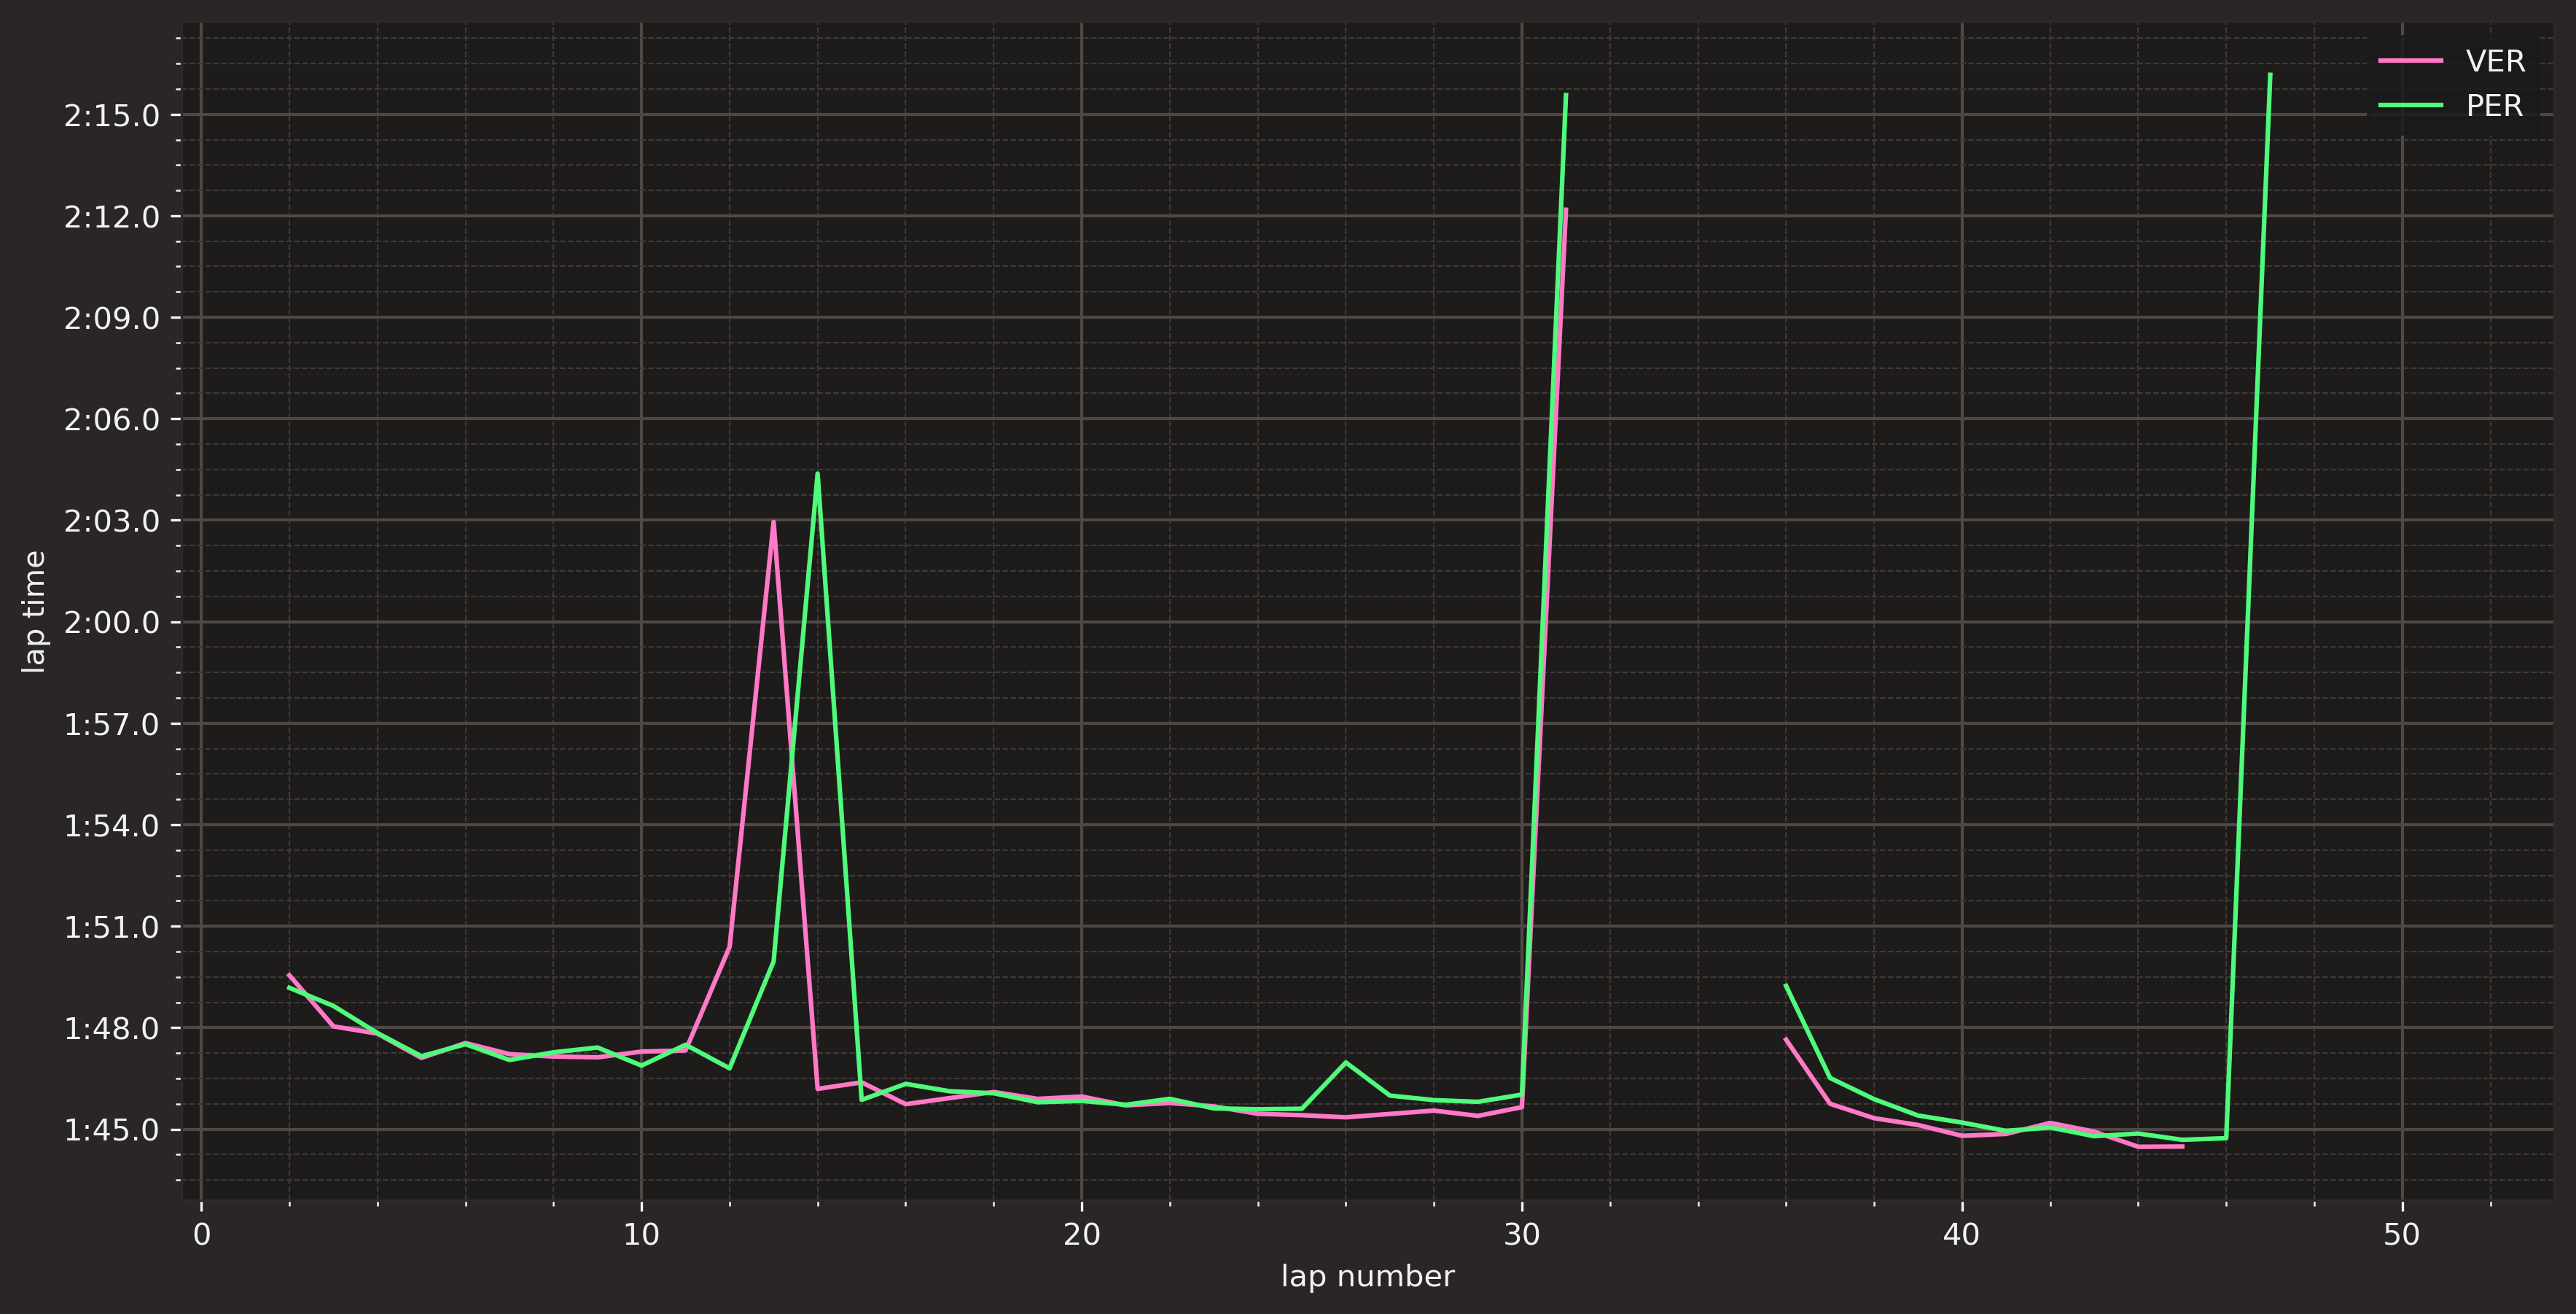

In [14]:
ver_data = race_session.laps.pick_driver('VER')
ver_t = ver_data['LapTime']
ver_i = ver_data['LapNumber']
print(ver_data)

per_data = race_session.laps.pick_driver('PER')
per_t = per_data['LapTime']
per_i = per_data['LapNumber']
print(per_data)

fig, ax = plt.subplots(figsize=(14, 7), dpi=300)
ax.plot(ver_i, ver_t, label='VER')
ax.plot(per_i, per_t, label='PER')
ax.set_xlabel('lap number')
ax.set_ylabel('lap time')
ax.legend()
plt.show()

##### 2. comparison and plot data of single lap

                       Date    RPM  Speed  nGear  Throttle  Brake  DRS Source  \
0   2021-06-05 13:11:47.282  11784    327      8       100  False   12    car   
1   2021-06-05 13:11:47.522  11872    328      8       100  False   12    car   
2   2021-06-05 13:11:47.762  11829    328      8       100  False   12    car   
3   2021-06-05 13:11:48.002  11850    329      8       100  False   12    car   
4   2021-06-05 13:11:48.242  11814    329      8       100  False   12    car   
..                      ...    ...    ...    ...       ...    ...  ...    ...   
417 2021-06-05 13:13:27.563  11689    325      8       100  False   12    car   
418 2021-06-05 13:13:27.802  11774    326      8       100  False   12    car   
419 2021-06-05 13:13:28.003  11723    326      8       100  False   12    car   
420 2021-06-05 13:13:28.243  11834    326      8       100  False   12    car   
421 2021-06-05 13:13:28.483  11704    325      8       100  False   12    car   

                      Time 

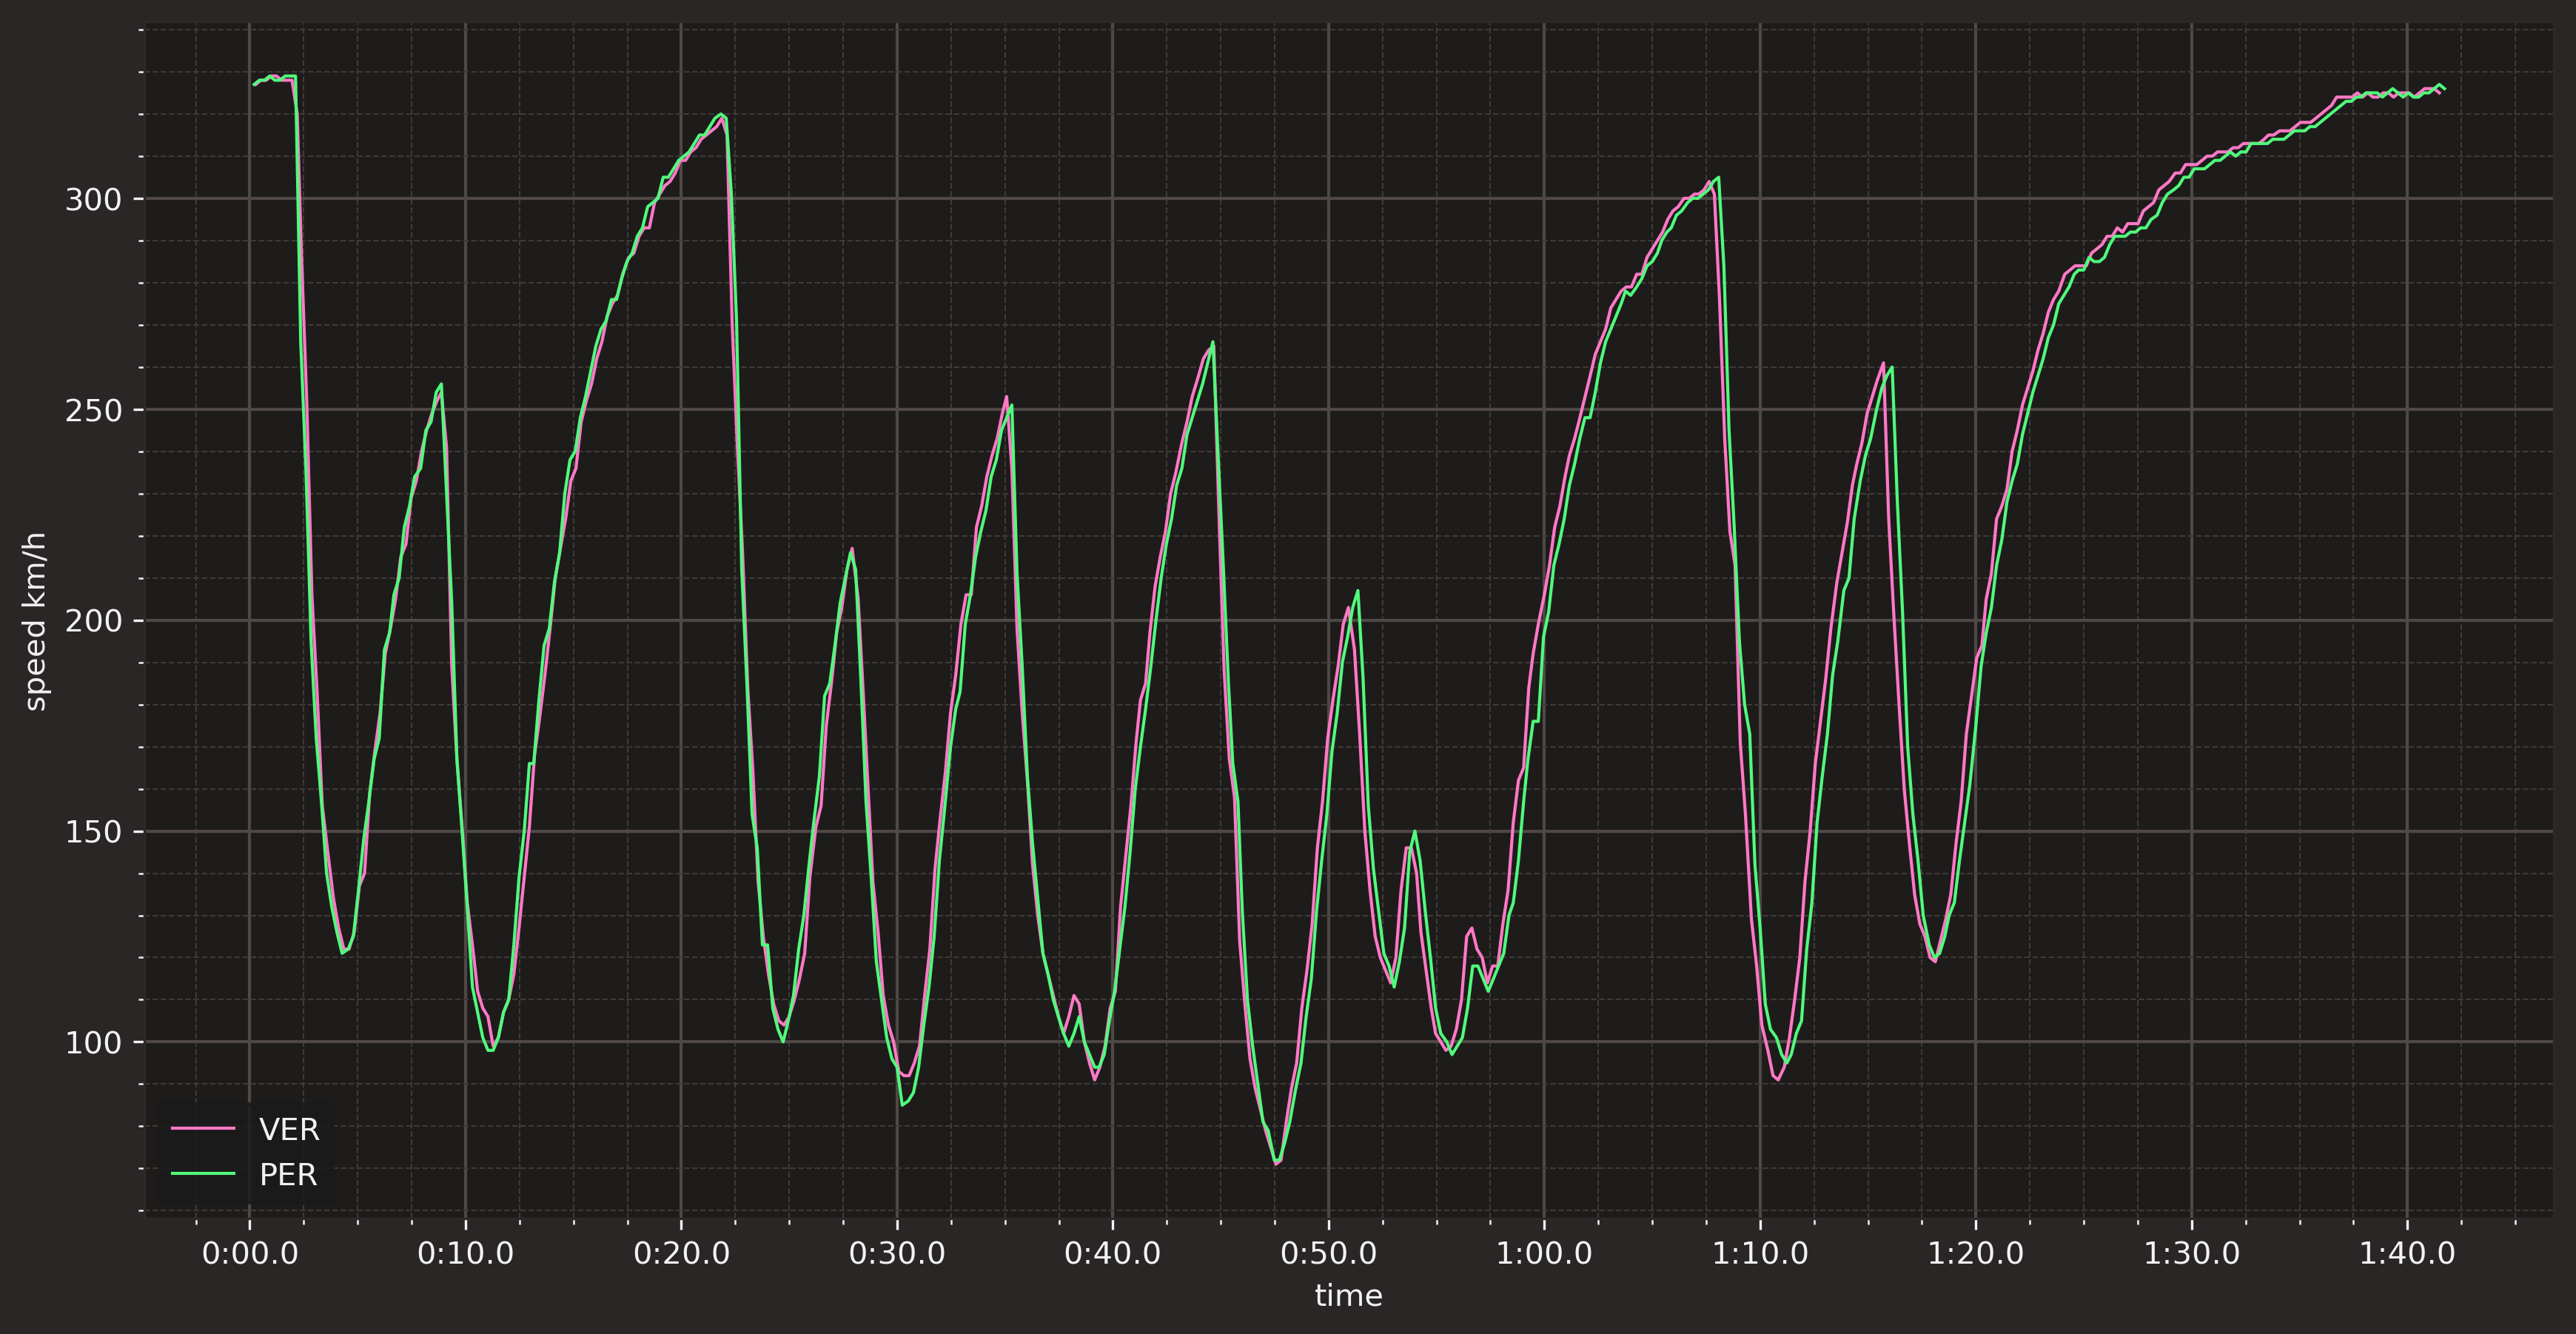

In [15]:
ver_fastest = qualifying_session.laps.pick_driver('VER').pick_fastest()
per_fastest = qualifying_session.laps.pick_driver('PER').pick_fastest()

ver_data_fastest = ver_fastest.get_car_data()
per_data_fastest = per_fastest.get_car_data()

print(ver_data_fastest)
print(per_data_fastest)

ver_t = ver_data_fastest['Time']
ver_s = ver_data_fastest['Speed']
per_t = per_data_fastest['Time']
per_s = per_data_fastest['Speed']

fig, ax = plt.subplots(figsize=(14, 7), dpi=300)
ax.plot(ver_t, ver_s, label='VER', linewidth=1)
ax.plot(per_t, per_s, label='PER', linewidth=1)
ax.set_xlabel('time')
ax.set_ylabel('speed km/h')
ax.legend()
plt.show()

Time                      0 days 01:29:43.300000
DriverNumber                                  44
LapTime                   0 days 00:01:41.450000
LapNumber                                     18
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:35.533000
Sector2Time               0 days 00:00:40.683000
Sector3Time               0 days 00:00:25.234000
Sector1SessionTime        0 days 01:28:37.383000
Sector2SessionTime        0 days 01:29:18.066000
Sector3SessionTime        0 days 01:29:43.300000
SpeedI1                                    236.0
SpeedI2                                    246.0
SpeedFL                                    333.0
SpeedST                                    313.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife                                     3.0
FreshTyre                                   True
Stint               

/Users/blank/miniforge3/envs/python310/lib/python3.10/site-packages/fastf1/core.py:2328: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  super().__init__(*args, **kwargs)


AttributeError: 'Lap' object has no attribute 'session'

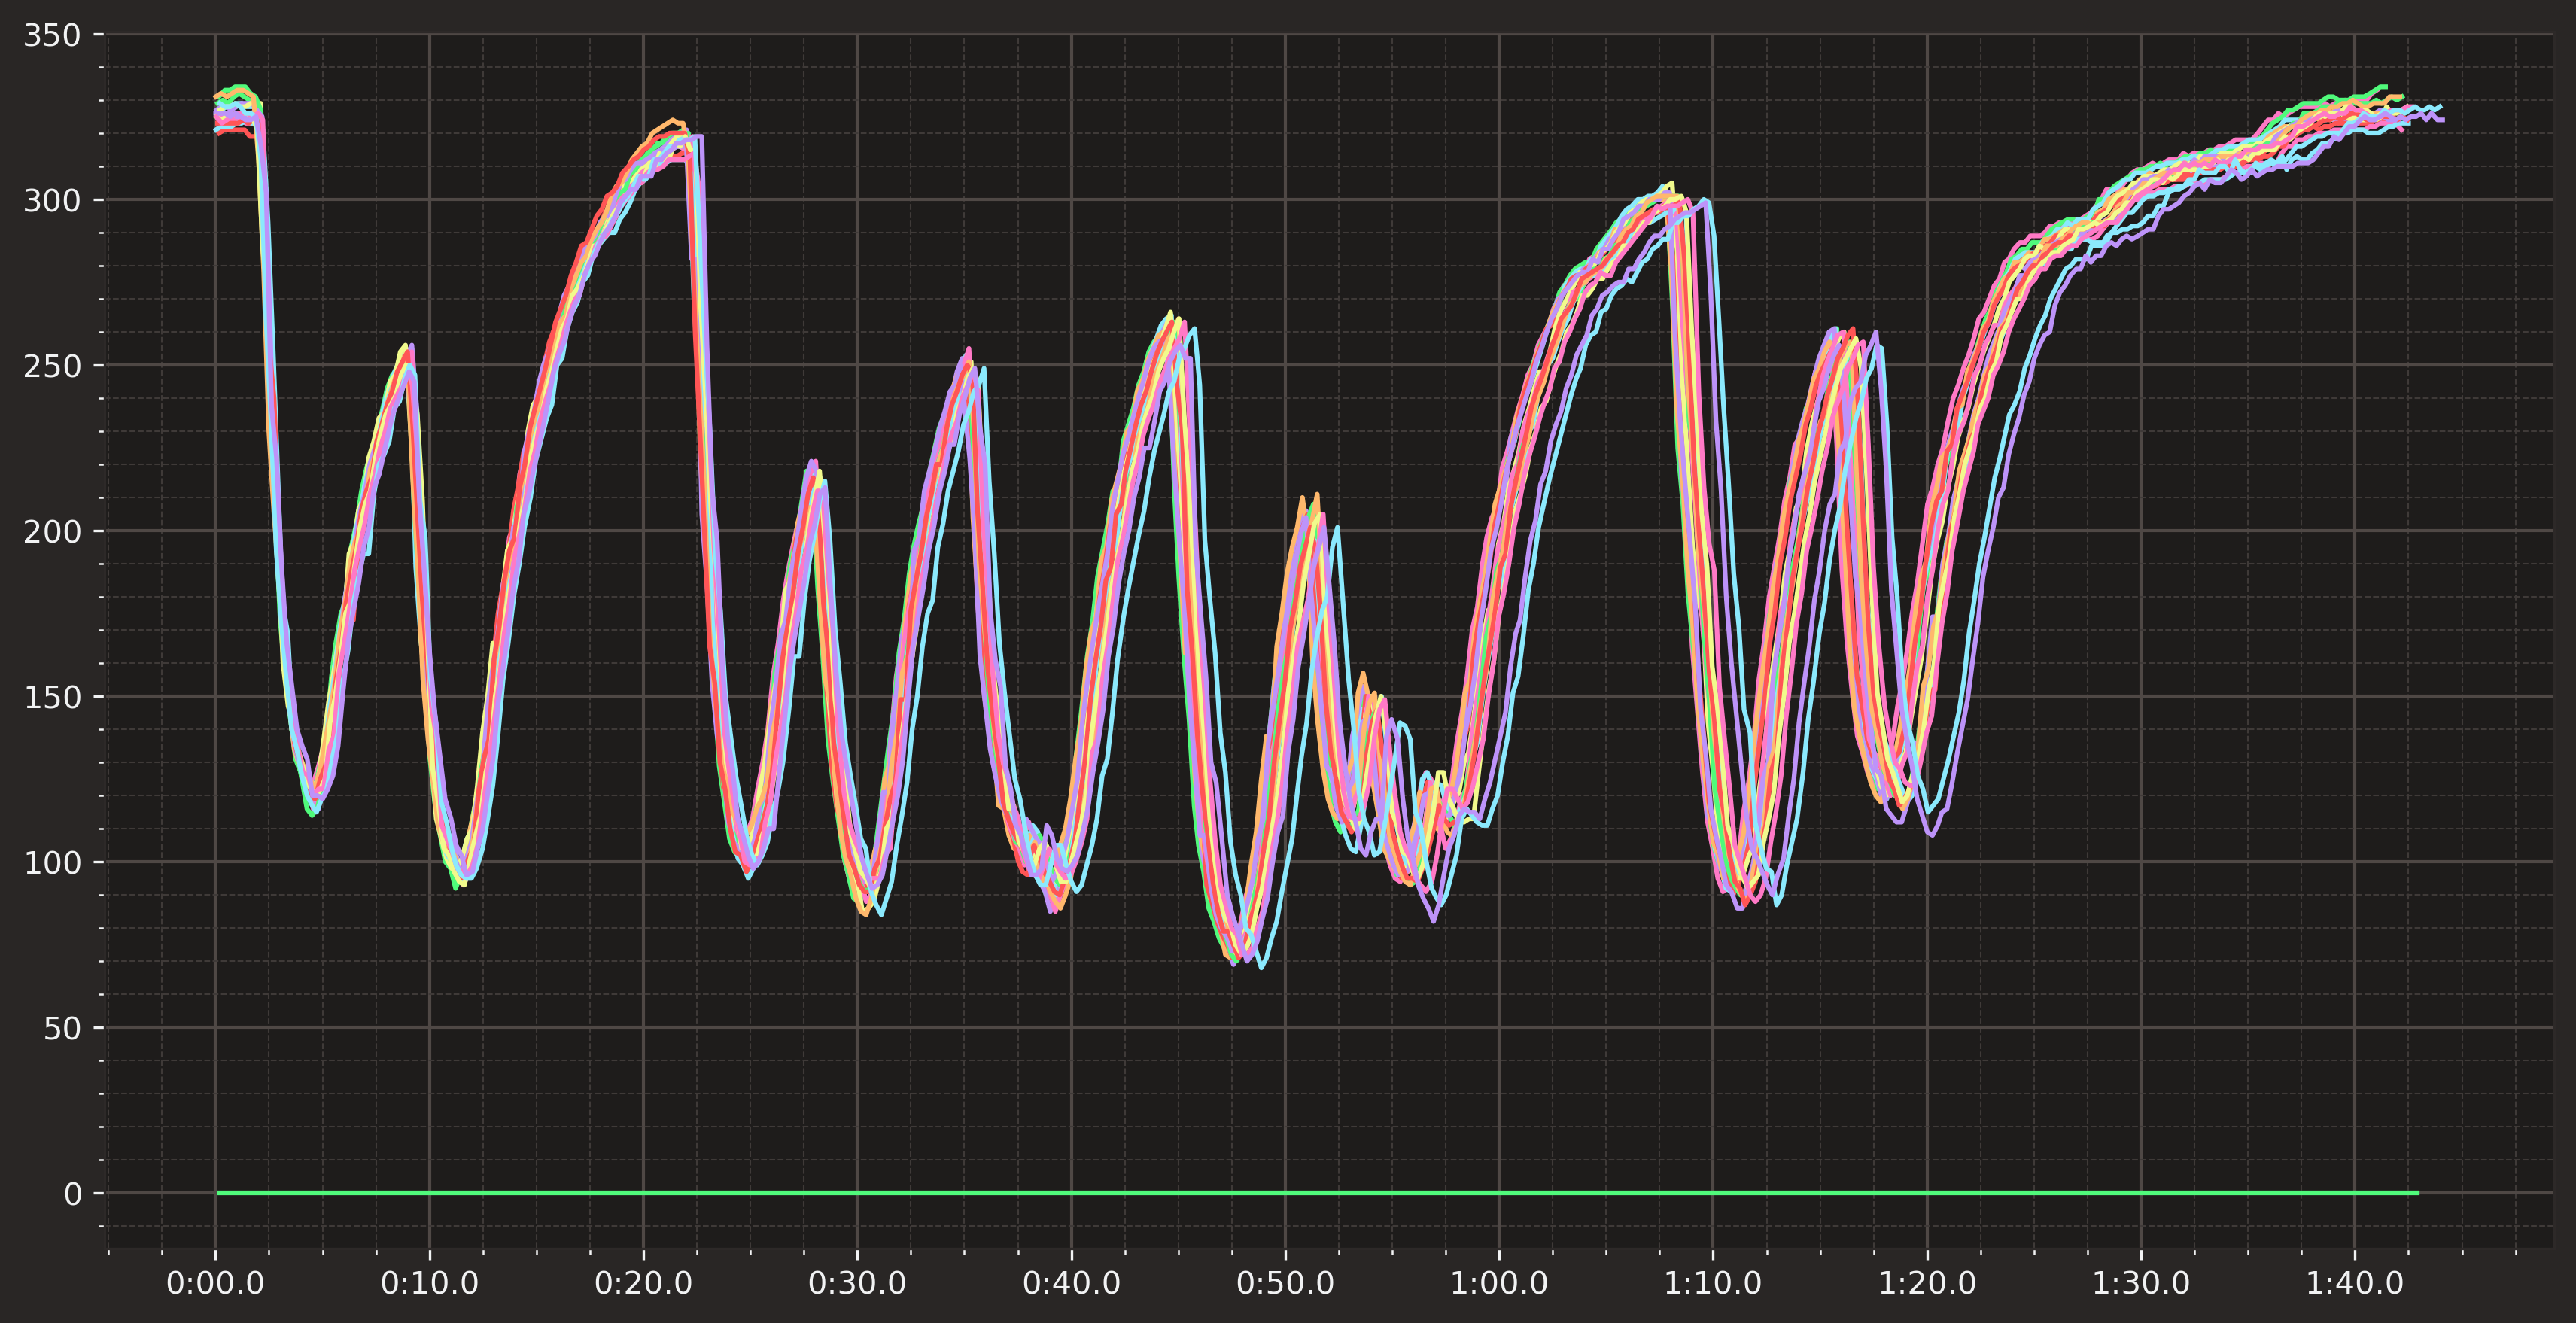

In [16]:
laps = qualifying_session.laps
drivers = qualifying_session.drivers
fastest_laps = list()
for driver in drivers:
    fastest_laps.append(laps.pick_driver(driver).pick_fastest())
print(fastest_laps[1])

fig, ax = plt.subplots(figsize=(14, 7), dpi=300)
for fastest_lap in fastest_laps:
    ax.plot(fastest_lap.get_car_data()['Time'], fastest_lap.get_car_data()['Speed'], label=fastest_lap.Driver)
ax.set_xlabel('time')
ax.set_ylabel('speed km/h')
ax.legend()
plt.show()